<a href="https://colab.research.google.com/github/WHU-Peter/COMP6248-Deep-Learning/blob/master/DL_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# We're going to use a library called celluloid to make animations that work on colab
try: 
    from celluloid import Camera
except:
    !pip install celluloid

from celluloid import Camera
from IPython.display import HTML
import torch
import torch.optim as optim
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import pandas as pd
from torch.utils import data

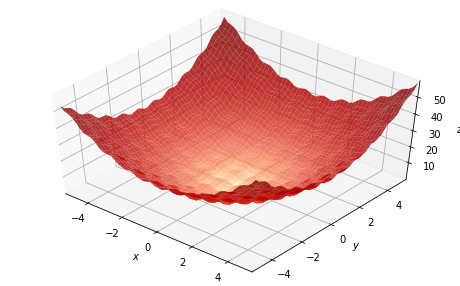

In [13]:
def function(x):
  return torch.tensor(2) + x[0]**2 + x[1]**2 - torch.cos(2*math.pi*x[0]) - torch.cos(2*math.pi*x[1])

xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = function(torch.tensor([x, y])).detach().numpy()

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.OrRd)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

(-5.12, 5.12)

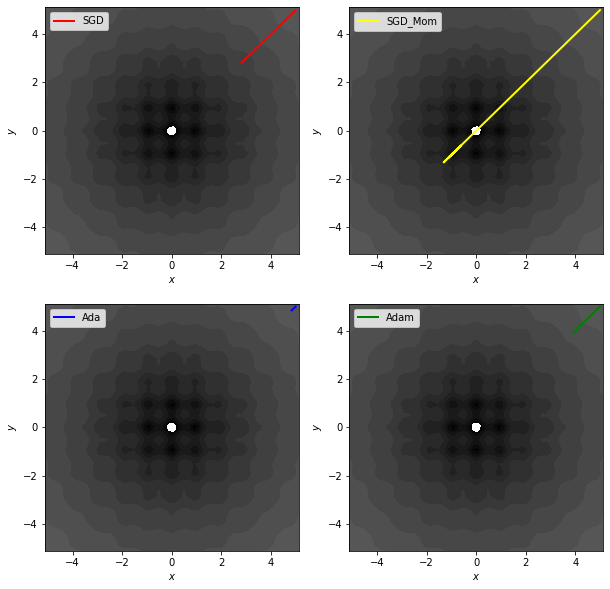

In [20]:
def optimal(p, opt):
  epochs = 100
  path = np.empty((2,0))
  path = np.append(path, p.data.numpy(), axis=1)
  for i in range(epochs):
    opt.zero_grad()
    output = function(p)
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)
  return path

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)
path_sgd = optimal(p, opt)

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)
path_sgd_mom = optimal(p, opt)

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)
path_ada = optimal(p, opt)

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)
path_adam = optimal(p, opt)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0,0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[0,0].plot(path_sgd[0], path_sgd[1], color='red', label='SGD', linewidth=2)
ax[0,0].legend()
ax[0,0].set_xlabel('$x$')
ax[0,0].set_ylabel('$y$')
ax[0,0].set_xlim((xmin, xmax))
ax[0,0].set_ylim((ymin, ymax))
ax[0,1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[0,1].plot(path_sgd_mom[0], path_sgd_mom[1], color='yellow', label='SGD_Mom', linewidth=2)
ax[0,1].legend()
ax[0,1].set_xlabel('$x$')
ax[0,1].set_ylabel('$y$')
ax[0,1].set_xlim((xmin, xmax))
ax[0,1].set_ylim((ymin, ymax))
ax[1,0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[1,0].plot(path_ada[0], path_ada[1], color='blue', label='Ada', linewidth=2)
ax[1,0].legend()
ax[1,0].set_xlabel('$x$')
ax[1,0].set_ylabel('$y$')
ax[1,0].set_xlim((xmin, xmax))
ax[1,0].set_ylim((ymin, ymax))
ax[1,1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[1,1].plot(path_adam[0], path_adam[1], color='green', label='Adam', linewidth=2)
ax[1,1].legend()
ax[1,1].set_xlabel('$x$')
ax[1,1].set_ylabel('$y$')
ax[1,1].set_xlim((xmin, xmax))
ax[1,1].set_ylim((ymin, ymax))

Text(0, 0.5, 'Fuction Value')

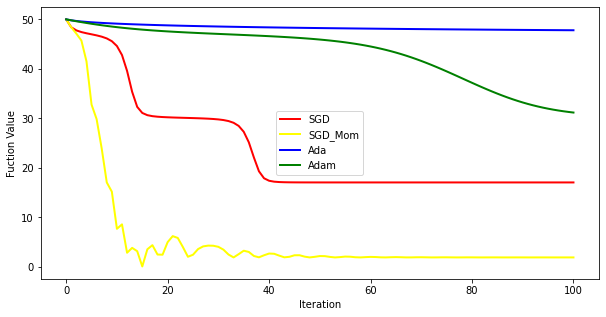

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(function(torch.tensor(path_sgd)), color='red', label='SGD', linewidth=2)
ax.plot(function(torch.tensor(path_sgd_mom)), color='yellow', label='SGD_Mom', linewidth=2)
ax.plot(function(torch.tensor(path_ada)), color='blue', label='Ada', linewidth=2)
ax.plot(function(torch.tensor(path_adam)), color='green', label='Adam', linewidth=2)
ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Fuction Value')
# ax[0,0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
# ax[0,0].plot(path_sgd[0], path_sgd[1], color='red', label='SGD', linewidth=2)
# ax[0,0].legend()
# ax[0,0].set_xlabel('$x$')
# ax[0,0].set_ylabel('$y$')
# ax[0,0].set_xlim((xmin, xmax))
# ax[0,0].set_ylim((ymin, ymax))
# ax[0,1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
# ax[0,1].plot(path_sgd_mom[0], path_sgd_mom[1], color='yellow', label='SGD_Mom', linewidth=2)
# ax[0,1].legend()
# ax[0,1].set_xlabel('$x$')
# ax[0,1].set_ylabel('$y$')
# ax[0,1].set_xlim((xmin, xmax))
# ax[0,1].set_ylim((ymin, ymax))
# ax[1,0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
# ax[1,0].plot(path_ada[0], path_ada[1], color='blue', label='Ada', linewidth=2)
# ax[1,0].legend()
# ax[1,0].set_xlabel('$x$')
# ax[1,0].set_ylabel('$y$')
# ax[1,0].set_xlim((xmin, xmax))
# ax[1,0].set_ylim((ymin, ymax))
# ax[1,1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
# ax[1,1].plot(path_adam[0], path_adam[1], color='green', label='Adam', linewidth=2)
# ax[1,1].legend()
# ax[1,1].set_xlabel('$x$')
# ax[1,1].set_ylabel('$y$')
# ax[1,1].set_xlim((xmin, xmax))
# ax[1,1].set_ylim((ymin, ymax))

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = df.sample(frac=1, random_state=0) #shuffle
df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] #filter
# add label indices column
mapping = {k: v for v, k in enumerate(df [4]. unique())} 
df[5] = (2 * df[4].map(mapping)) - 1 #labels in {−1,1}

# normalise data
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)
# create datasets
targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype=torch.long) 
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype=torch.long) 
data_tr = alldata [:75]
data_va = alldata [75:]

dataset = data.TensorDataset(data_tr,targets_tr) # create your datset
dataloader = data.DataLoader(dataset, batch_size=25) # create your dataloader

In [ ]:
def hinge_loss(y_pred, y_true):
    return torch.mean(torch.clamp(1 - y_pred.mul(y_true), min=0))

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

[[0.26071093 0.43486779 0.40288306 0.2965966 ]] [0.94999288]


Text(0.5, 1.0, 'Adam')

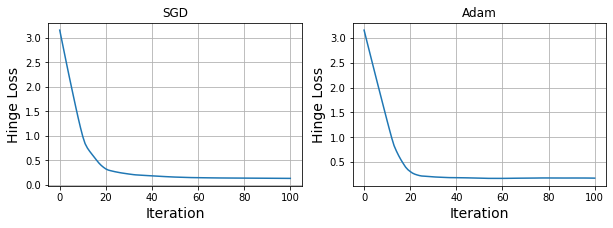

In [ ]:
def grad(opt, w, b):
  epochs = 100
  Loss = np.zeros(epochs + 1)
  for epoch in range(epochs):
      Loss[epoch] = hinge_loss(svm(data_va, w, b), targets_va)
      for batch in dataloader:
        opt.zero_grad()
        output = hinge_loss(svm(batch[0], w, b), batch[1])
        output.backward()
        opt.step()
  Loss[epochs] = hinge_loss(svm(data_va, w, b), targets_va)
  return Loss

w = np.random.rand(1, 4)
b = np.random.rand(1)
print(w, b)
w1 = torch.tensor(w, requires_grad=True)
b1 = torch.tensor(b, requires_grad=True)
opt1 = optim.SGD([w1,b1], lr=0.01, weight_decay=0.0001)
Loss1 = grad(opt1, w1, b1)

w2 = torch.tensor(w, requires_grad=True)
b2 = torch.tensor(b, requires_grad=True)
opt2 = optim.Adam([w2,b2], lr=0.01, weight_decay=0.0001)
Loss2 = grad(opt2, w2, b2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ax[0].plot(Loss1)
ax[0].grid()
ax[0].set_xlabel("Iteration", fontsize=14)
ax[0].set_ylabel("Hinge Loss", fontsize=14)
ax[0].set_title("SGD",fontsize=12)
ax[1].plot(Loss2)
ax[1].grid()
ax[1].set_xlabel("Iteration", fontsize=14)
ax[1].set_ylabel("Hinge Loss", fontsize=14)
ax[1].set_title("Adam",fontsize=12)

[[0.5519538  0.86417031 0.98352606 0.80373925]] [0.48221226]
[[0.20455219 0.99271734 0.27235746 0.98264921]] [0.32887335]
[[0.96546705 0.6432923  0.07298753 0.90802595]] [0.12626594]
[[0.09652957 0.14423583 0.73229865 0.66423182]] [0.96384755]
[[0.76798345 0.97137637 0.78985732 0.08360473]] [0.82752084]
[[0.76196765 0.76868757 0.68733042 0.65444088]] [0.28177115]
[[0.61342632 0.1812338  0.9784977  0.85220366]] [0.7063257]
[[0.63281467 0.07450658 0.42971354 0.00664227]] [0.97365543]
[[0.13916746 0.3745256  0.97867671 0.89548355]] [0.95371911]
[[0.33659399 0.15513528 0.55529277 0.198748  ]] [0.1661819]
[[0.97141881 0.77761331 0.13622505 0.33084988]] [0.49943899]
[[0.56255099 0.19053063 0.08031353 0.59313114]] [0.33796014]
[[0.35113802 0.59467993 0.49232659 0.54904854]] [0.89805649]
[[0.17409215 0.08460881 0.78928255 0.10106597]] [0.8133424]
[[0.08970958 0.98671315 0.45198272 0.44266325]] [0.65911709]
[[0.08932631 0.69087005 0.85380258 0.42490691]] [0.88420929]
[[0.16559054 0.85634215 0.0

Text(0.5, 1.0, 'Adam')

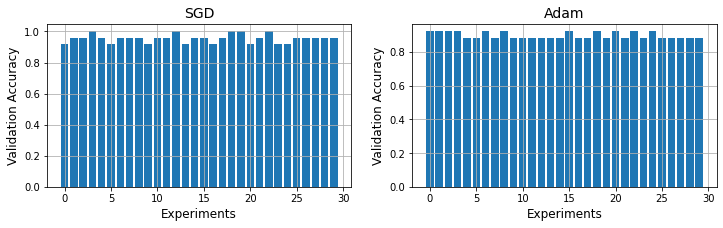

In [ ]:
Acc1 = np.empty(1)
Acc2 = np.empty(1)

for i in range(30):
  w = np.random.rand(1, 4)
  b = np.random.rand(1)
  print(w, b)
  w1 = torch.tensor(w, requires_grad=True)
  b1 = torch.tensor(b, requires_grad=True)
  opt1 = optim.SGD([w1,b1], lr=0.01, weight_decay=0.0001)
  grad(opt1, w1, b1)
  y_pred = svm(data_va, w1, b1)
  y_pred[np.where(y_pred <= 0.)] = -1
  y_pred[np.where(y_pred > 0.)] = 1
  error = np.nonzero(y_pred - targets_va)
  Acc1 = np.append(Acc1, 1-(np.array(error).shape[0] / targets_va.shape[0]))
  
  w2 = torch.tensor(w, requires_grad=True)
  b2 = torch.tensor(b, requires_grad=True)
  opt2 = optim.Adam([w2,b2], lr=0.01, weight_decay=0.0001)
  Loss2 = grad(opt2, w2, b2)
  y_pred = svm(data_va, w2, b2)
  y_pred[np.where(y_pred <= 0.)] = -1
  y_pred[np.where(y_pred > 0.)] = 1
  error = np.nonzero(y_pred - targets_va)
  Acc2 = np.append(Acc2, 1-(np.array(error).shape[0] / targets_va.shape[0]))

Acc1 = Acc1[1:]
Acc2 = Acc2[1:]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax[0].bar(range(30), Acc1)
ax[0].grid()
ax[0].set_xlabel("Experiments", fontsize=12)
ax[0].set_ylabel("Validation Accuracy", fontsize=12)
ax[0].set_title("SGD",fontsize=14)
ax[1].bar(range(30), Acc2)
ax[1].grid()
ax[1].set_xlabel("Experiments", fontsize=12)
ax[1].set_ylabel("Validation Accuracy", fontsize=12)
ax[1].set_title("Adam",fontsize=14)